In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Drive File Stream
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


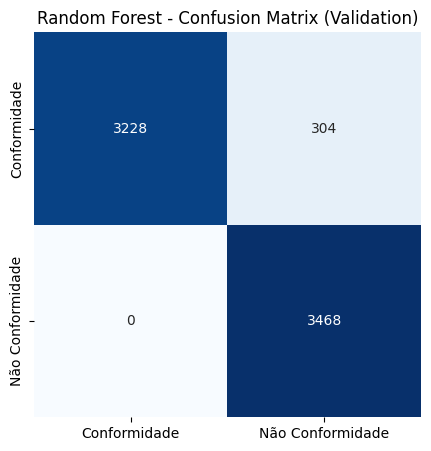

Model: Random Forest
Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3532
           1       0.92      1.00      0.96      3468

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000




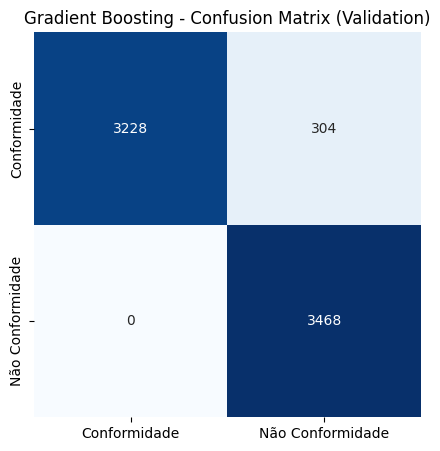

Model: Gradient Boosting
Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3532
           1       0.92      1.00      0.96      3468

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000




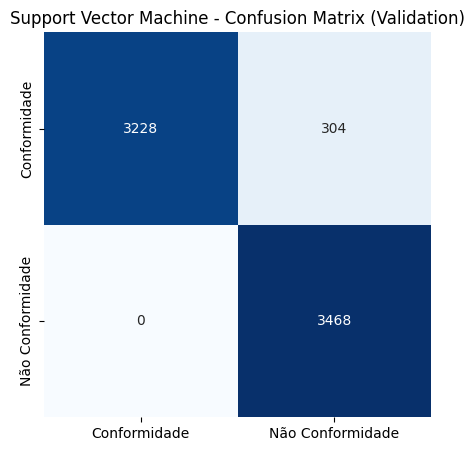

Model: Support Vector Machine
Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3532
           1       0.92      1.00      0.96      3468

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000




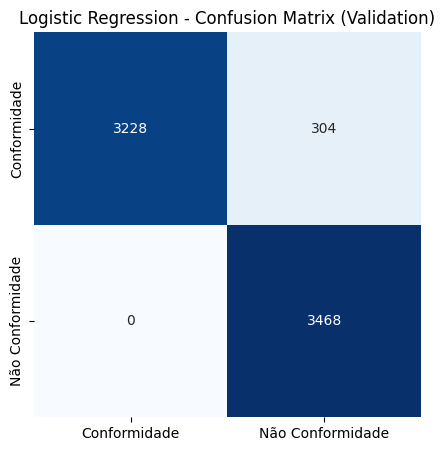

Model: Logistic Regression
Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3532
           1       0.92      1.00      0.96      3468

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000




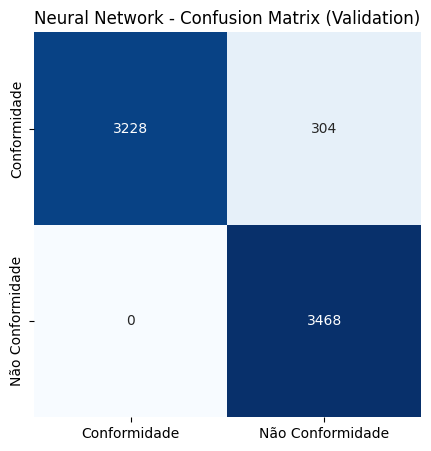

Model: Neural Network
Validation Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96      3532
           1       0.92      1.00      0.96      3468

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000




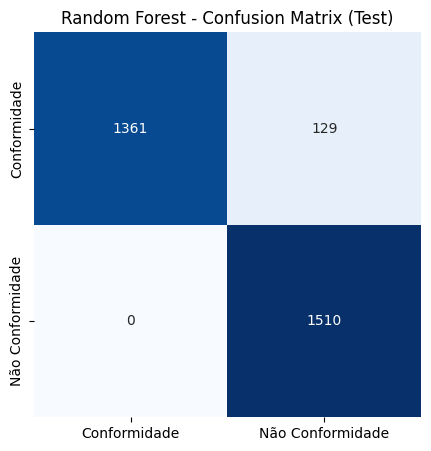

Best Model: Random Forest
Test Accuracy: 0.96
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1490
           1       0.92      1.00      0.96      1510

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [3]:
# Carregar o conjunto de dados
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/MBM-Inovahack/foodtruck_dataset_50000_balanceado.csv"
df = pd.read_csv(FILE_PATH)

# Separar features e target
X = df.drop(['Nome', 'Conformidade_ESG'], axis=1)
y = df['Conformidade_ESG']

# Dividir o conjunto de dados em treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# Padronizar as features (opcional, mas muitas vezes benéfico)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Inicializar modelos
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(random_state=42)
}

# Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_val_scaled)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions)

    # Imprimir matriz de confusão
    cm = confusion_matrix(y_val, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Conformidade', 'Não Conformidade'],
                yticklabels=['Conformidade', 'Não Conformidade'])
    plt.title(f'{name} - Confusion Matrix (Validation)')
    plt.show()

    print(f"Model: {name}\nValidation Accuracy: {accuracy:.2f}\nClassification Report:\n{report}\n{'='*40}\n")

# Escolher o melhor modelo com base na validação e avaliar no conjunto de teste
best_model = max(models, key=lambda k: accuracy_score(y_val, models[k].predict(X_val_scaled)))
test_predictions = models[best_model].predict(X_test_scaled)

# Imprimir matriz de confusão para o melhor modelo no conjunto de teste
test_cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Conformidade', 'Não Conformidade'],
            yticklabels=['Conformidade', 'Não Conformidade'])
plt.title(f'{best_model} - Confusion Matrix (Test)')
plt.show()

test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

print(f"Best Model: {best_model}\nTest Accuracy: {test_accuracy:.2f}\nTest Classification Report:\n{test_report}")